

#  **GCN on Citeseer with Saliency-Based Graph Pruning**

### *A complete experiment on graph learning, gradient-based saliency, and structural pruning*








In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import torch

if torch.cuda.is_available():

    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")


CUDA is available. Using GPU.


##  **1. Libraries**


In [2]:
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install numpy==1.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 29.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
!git clone https://github.com/DSE-MSU/DeepRobust.git
%cd DeepRobust
!python setup.py install

Cloning into 'DeepRobust'...
remote: Enumerating objects: 5890, done.
remote: Counting objects: 100% (1602/1602), done.
remote: Compressing objects: 100% (682/682), done.
remote: Total 5890 (delta 999), reused 1484 (delta 903), pack-reused 4288 (from 1)
Receiving objects: 100% (5890/5890), 12.10 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (3862/3862), done.
/content/DeepRobust
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/pyth

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
!pip install --upgrade scipy networkx
!pip install --verbose --no-cache-dir torch-scatter
!pip install --verbose --no-cache-dir torch-sparse
!pip install --verbose --no-cache-dir torch-cluster
!pip install --verbose --no-cache-dir torch-spline-conv

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enf

KeyboardInterrupt: 

In [6]:
!pip install deeprobust
!pip install torch-geometric

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/deeprobust-0.2.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enf

In [1]:
pip install deeprobust


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


KeyboardInterrupt: 

In [2]:
!pip install gensim

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/gensim-4.4.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/tensorboardx-2.6.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
# Import necessary modules
from deeprobust.graph.defense import GCN
from deeprobust.graph.data import Dataset
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from deeprobust.graph.defense import GCN
from deeprobust.graph.data import Dataset
import warnings
warnings.filterwarnings('ignore')


No module named 'torch_sparse'


/usr/local/lib/python3.12/dist-packages/deeprobust/graph/defense/__init__.py:15: UserWarning: Please install pytorch geometric if you would like to use the datasets from pytorch geometric. See details in https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html
  warnings.warn("Please install pytorch geometric if you " +


In [4]:
# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


##  **2. Dataset — Citeseer**

In [5]:
# Load the Citeseer dataset
print("\n=== Loading Citeseer Dataset ===")
data = Dataset(root='/tmp/', name='citeseer', seed=15)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test



=== Loading Citeseer Dataset ===
Loading citeseer dataset...
Done!
Selecting 1 largest connected components


In [6]:
# Print dataset statistics
print("\n=== Citeseer Dataset Statistics ===")
print(f"Number of nodes: {adj.shape[0]}")
print(f"Number of edges: {adj.nnz // 2}")  # Divide by 2 for undirected graph
print(f"Number of features per node: {features.shape[1]}")
print(f"Number of classes: {labels.max() + 1}")  # Labels are 0-indexed
print(f"\nClass distribution:")
unique_classes, class_counts = np.unique(labels, return_counts=True)
for cls, count in zip(unique_classes, class_counts):
    print(f"  Class {cls}: {count} nodes ({count/len(labels)*100:.1f}%)")

print(f"\nTraining set size: {len(idx_train)} nodes ({len(idx_train)/len(labels)*100:.1f}%)")
print(f"Validation set size: {len(idx_val)} nodes ({len(idx_val)/len(labels)*100:.1f}%)")
print(f"Test set size: {len(idx_test)} nodes ({len(idx_test)/len(labels)*100:.1f}%)")



=== Citeseer Dataset Statistics ===
Number of nodes: 2110
Number of edges: 3668
Number of features per node: 3703
Number of classes: 6

Class distribution:
  Class 0: 115 nodes (5.5%)
  Class 1: 463 nodes (21.9%)
  Class 2: 388 nodes (18.4%)
  Class 3: 304 nodes (14.4%)
  Class 4: 532 nodes (25.2%)
  Class 5: 308 nodes (14.6%)

Training set size: 210 nodes (10.0%)
Validation set size: 211 nodes (10.0%)
Test set size: 1688 nodes (80.0%)


In [7]:
# Calculate node degrees
degrees = np.array(adj.sum(axis=1)).flatten()
print(f"\nNode degree statistics:")
print(f"  Average degree: {degrees.mean():.2f}")
print(f"  Minimum degree: {degrees.min()}")
print(f"  Maximum degree: {degrees.max()}")
print(f"  Median degree: {np.median(degrees)}")



Node degree statistics:
  Average degree: 3.48
  Minimum degree: 1.0
  Maximum degree: 99.0
  Median degree: 2.0


In [8]:
# Check graph connectivity
print(f"\nGraph density: {adj.nnz / (adj.shape[0] * adj.shape[1]) * 100:.4f}%")
print(f"Is graph symmetric (undirected): {np.allclose(adj.todense(), adj.todense().T)}")

# Feature matrix statistics
print(f"\nFeature matrix statistics:")
print(f"  Shape: {features.shape}")
print(f"  Density: {features.nnz / (features.shape[0] * features.shape[1]) * 100:.2f}%")
print(f"  Number of non-zero entries: {features.nnz}")
print(f"  Average non-zero features per node: {features.nnz / features.shape[0]:.2f}")


Graph density: 0.1648%
Is graph symmetric (undirected): True

Feature matrix statistics:
  Shape: (2110, 3703)
  Density: 0.87%
  Number of non-zero entries: 67659
  Average non-zero features per node: 32.07


In [9]:
# Print sample data
print("\n=== Sample Data ===")
print(f"Sample adjacency row (node 0): {adj[0].toarray().flatten()[:10]}...")
print(f"Sample features (node 0): {features[0].toarray().flatten()[:10]}...")
print(f"Sample label (node 0): {labels[0]}")


=== Sample Data ===
Sample adjacency row (node 0): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Sample features (node 0): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
Sample label (node 0): 1


##  **Data Preprocessing**

In [10]:
# Convert data to PyTorch tensors
print("\n=== Preparing Data for GCN ===")
features = torch.FloatTensor(features.todense()).to(device)
labels = torch.LongTensor(labels).to(device)
idx_train = torch.LongTensor(idx_train).to(device)
idx_val = torch.LongTensor(idx_val).to(device)
idx_test = torch.LongTensor(idx_test).to(device)

print(f"Features tensor shape: {features.shape}")
print(f"Labels tensor shape: {labels.shape}")
print(f"Number of unique labels in tensor: {labels.unique().size(0)}")



=== Preparing Data for GCN ===
Features tensor shape: torch.Size([2110, 3703])
Labels tensor shape: torch.Size([2110])
Number of unique labels in tensor: 6


##  **Baseline GCN Model**

In [11]:
# Create the GCN model
print("\n=== Creating GCN Model ===")
model = GCN(nfeat=features.shape[1],
            nhid=16,
            nclass=labels.max().item() + 1,
            dropout=0.5,
            device=device)

model = model.to(device)
print(f"GCN Model Configuration:")
print(f"  Input features: {features.shape[1]}")
print(f"  Hidden units: 16")
print(f"  Output classes: {labels.max().item() + 1}")
print(f"  Dropout rate: 0.5")
print(f"  Number of parameters: {sum(p.numel() for p in model.parameters()):,}")


=== Creating GCN Model ===
GCN Model Configuration:
  Input features: 3703
  Hidden units: 16
  Output classes: 6
  Dropout rate: 0.5
  Number of parameters: 59,366


In [12]:
# Prepare the adjacency matrix for GCN
print("\n=== Preparing Adjacency Matrix ===")
adj_dense = adj.todense()
adj_tensor = torch.FloatTensor(adj_dense).to(device)
print(f"Adjacency matrix shape: {adj_tensor.shape}")
print(f"Adjacency matrix density: {(adj_tensor != 0).sum().item() / (adj_tensor.shape[0] * adj_tensor.shape[1]) * 100:.2f}%")



=== Preparing Adjacency Matrix ===
Adjacency matrix shape: torch.Size([2110, 2110])
Adjacency matrix density: 0.16%


##  **Training the Model**

In [13]:
# Define the training function
def train(model, features, adj, labels, idx_train, idx_val, epochs=200):
    print(f"\n=== Training GCN for {epochs} epochs ===")
    model.fit(features, adj, labels, idx_train, idx_val,
              train_iters=epochs, verbose=True)
    model.eval()
    output = model.predict()

    # Calculate accuracy
    acc_train = accuracy(output[idx_train], labels[idx_train])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    acc_test = accuracy(output[idx_test], labels[idx_test])

    print(f"\n=== Final Results ===")
    print(f"Train accuracy: {acc_train:.4f}")
    print(f"Validation accuracy: {acc_val:.4f}")
    print(f"Test accuracy: {acc_test:.4f}")

    return model, output

# Define accuracy function
def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)


In [14]:
# Train the GCN model
trained_model, predictions = train(model, features, adj_tensor, labels, idx_train, idx_val, epochs=200)



=== Training GCN for 200 epochs ===
=== training gcn model ===
Epoch 0, training loss: 1.783532738685608
Epoch 10, training loss: 0.4677395820617676
Epoch 20, training loss: 0.1458071768283844
Epoch 30, training loss: 0.08519219607114792
Epoch 40, training loss: 0.06806138157844543
Epoch 50, training loss: 0.05416305363178253
Epoch 60, training loss: 0.052491623908281326
Epoch 70, training loss: 0.044731058180332184
Epoch 80, training loss: 0.04179074987769127
Epoch 90, training loss: 0.06105056777596474
Epoch 100, training loss: 0.031998153775930405
Epoch 110, training loss: 0.04276313632726669
Epoch 120, training loss: 0.049379777163267136
Epoch 130, training loss: 0.0476759634912014
Epoch 140, training loss: 0.04012943431735039
Epoch 150, training loss: 0.03563511371612549
Epoch 160, training loss: 0.035442717373371124
Epoch 170, training loss: 0.034283075481653214
Epoch 180, training loss: 0.03634294494986534
Epoch 190, training loss: 0.023561522364616394
=== picking the best mode

In [15]:
# Analyze predictions
print("\n=== Prediction Analysis ===")
pred_labels = predictions.max(1)[1]
print(f"Prediction shape: {predictions.shape}")


=== Prediction Analysis ===
Prediction shape: torch.Size([2110, 6])


In [16]:
# Calculate per-class accuracy on test set
print("\nPer-class accuracy on test set:")
test_preds = pred_labels[idx_test]
test_true = labels[idx_test]
for cls in range(labels.max().item() + 1):
    cls_mask = test_true == cls
    if cls_mask.sum() > 0:
        cls_acc = (test_preds[cls_mask] == test_true[cls_mask]).float().mean().item()
        print(f"  Class {cls}: {cls_acc:.4f} ({cls_mask.sum().item()} samples)")

print("\n=== Training Complete ===")


Per-class accuracy on test set:
  Class 0: 0.1413 (92 samples)
  Class 1: 0.8221 (371 samples)
  Class 2: 0.7138 (311 samples)
  Class 3: 0.7490 (243 samples)
  Class 4: 0.8353 (425 samples)
  Class 5: 0.6179 (246 samples)

=== Training Complete ===


##  **Gradient-Based Pruning**

In [17]:
# Load Citeseer dataset
print("=== Loading Citeseer Dataset ===")
data = Dataset(root='/tmp/', name='citeseer', seed=15)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test
# Convert to dense tensors
features = torch.FloatTensor(features.todense()).to(device)
labels = torch.LongTensor(labels).to(device)
adj_dense = torch.FloatTensor(adj.todense()).to(device)
# Convert indices to torch tensors
idx_train_torch = torch.LongTensor(idx_train).to(device)
idx_val_torch = torch.LongTensor(idx_val).to(device)
idx_test_torch = torch.LongTensor(idx_test).to(device)

=== Loading Citeseer Dataset ===
Loading citeseer dataset...
Selecting 1 largest connected components


##  **Utility Functions**

In [18]:
# Accuracy function
def compute_accuracy(output, labels, indices=None):
    """Compute accuracy properly"""
    if indices is not None:
        if isinstance(indices, np.ndarray):
            indices = torch.LongTensor(indices).to(output.device)
        output = output[indices]
        labels = labels[indices]

    preds = output.max(1)[1]
    correct = preds.eq(labels).float().sum()
    return (correct / len(labels)).item()

In [19]:
# Create and train GCN with proper validation
def create_and_train_gcn_proper(adj_matrix, features, labels, idx_train, idx_val, idx_test,
                                model_name="GCN", epochs=200, lr=0.01, weight_decay=5e-4):
    print(f"\n=== Training {model_name} ===")

    # Create model
    model = GCN(nfeat=features.shape[1],
                nhid=16,
                nclass=labels.max().item() + 1,
                dropout=0.5,
                lr=lr,
                weight_decay=weight_decay,
                device=device)
    model = model.to(device)

    # Extract the PyTorch model from DeepRobust's wrapper
    pytorch_model = model

    # Create optimizer
    optimizer = torch.optim.Adam(pytorch_model.parameters(),
                                 lr=lr,
                                 weight_decay=weight_decay)

    # Early stopping
    best_val_acc = 0
    best_model_state = None
    patience = 50
    patience_counter = 0

    train_losses = []
    val_accs = []

    for epoch in range(epochs):
        pytorch_model.train()
        optimizer.zero_grad()

        # Forward pass
        output = pytorch_model(features, adj_matrix)

        # Training loss
        loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])

        # Backward pass
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        pytorch_model.eval()
        with torch.no_grad():
            val_output = pytorch_model(features, adj_matrix)
            val_acc = compute_accuracy(val_output, labels, idx_val)
            val_accs.append(val_acc)

            # Early stopping
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = pytorch_model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        if epoch % 50 == 0:
            train_acc = compute_accuracy(output, labels, idx_train)
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | "
                  f"Train: {train_acc:.4f} | Val: {val_acc:.4f}")

    # Load best model
    if best_model_state:
        pytorch_model.load_state_dict(best_model_state)

    # Final evaluation
    pytorch_model.eval()
    with torch.no_grad():
        final_output = pytorch_model(features, adj_matrix)
        acc_train = compute_accuracy(final_output, labels, idx_train)
        acc_val = compute_accuracy(final_output, labels, idx_val)
        acc_test = compute_accuracy(final_output, labels, idx_test)

    print(f"Final - Train: {acc_train:.4f}, Val: {acc_val:.4f}, Test: {acc_test:.4f}")

    return pytorch_model, final_output, {'train': acc_train, 'val': acc_val, 'test': acc_test}

In [20]:
# Saliency computation
def compute_edge_saliency_simple(model, features, adj, labels, idx_train):
    """Simple saliency computation"""
    model.eval()

    # Create a copy of adjacency that requires gradient
    adj_with_grad = adj.clone().detach().requires_grad_(True)

    # Forward pass
    output = model(features, adj_with_grad)

    # Loss on training nodes only
    loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])

    # Compute gradients
    loss.backward()

    # Get saliency scores (absolute gradient values)
    if adj_with_grad.grad is not None:
        saliency = torch.abs(adj_with_grad.grad)

        # Zero out diagonal (self-loops)
        saliency = saliency * (1 - torch.eye(adj.shape[0], device=device))
    else:
        # Fallback: use random values
        saliency = torch.rand_like(adj)

    # Clean up
    adj_with_grad.grad = None

    return saliency.cpu().detach().numpy()


In [21]:
# Pruning function
def prune_edges_by_saliency(adj_matrix, saliency_matrix, prune_ratio=0.3):
    """Prune edges based on saliency scores"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    # Get edges and their saliency scores
    edge_indices = np.where(adj_np > 0)
    edge_saliencies = saliency_matrix[edge_indices]

    # Sort edges by saliency (ascending - prune least important first)
    sorted_indices = np.argsort(edge_saliencies)

    # Calculate number of edges to prune
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    # Get indices of edges to prune (lowest saliency)
    prune_indices = sorted_indices[:n_prune]

    # Prune edges
    rows_to_prune = edge_indices[0][prune_indices]
    cols_to_prune = edge_indices[1][prune_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0  # Undirected graph

    print(f"Original edges: {n_edges}")
    print(f"Pruned edges: {n_prune} ({prune_ratio*100:.1f}%)")
    print(f"Remaining edges: {n_edges - n_prune}")

    # Check for isolated nodes
    node_degrees = adj_pruned.sum(axis=1)
    isolated_nodes = np.where(node_degrees == 0)[0]
    if len(isolated_nodes) > 0:
        print(f"Warning: {len(isolated_nodes)} isolated nodes created")

    return torch.FloatTensor(adj_pruned).to(device), prune_ratio


##  **Main Experiment**

In [22]:
# MAIN EXPERIMENT
print("\n" + "="*60)
print("SALIENCY-BASED PRUNING EXPERIMENT - CITESEER")
print("="*60)

# 1. Train original model
print("\n1. Training Original Model...")
original_model, original_output, original_acc = create_and_train_gcn_proper(
    adj_dense, features, labels, idx_train, idx_val, idx_test,
    "Original GCN", epochs=200, lr=0.01, weight_decay=5e-4
)

print(f"\nOriginal Model Results:")
print(f"  Train Accuracy: {original_acc['train']:.4f}")
print(f"  Validation Accuracy: {original_acc['val']:.4f}")
print(f"  Test Accuracy: {original_acc['test']:.4f}")
print(f"  Train-Test Gap: {original_acc['train'] - original_acc['test']:.4f}")



SALIENCY-BASED PRUNING EXPERIMENT - CITESEER

1. Training Original Model...

=== Training Original GCN ===
Epoch   0 | Loss: 8.1145 | Train: 0.1762 | Val: 0.3081
Epoch  50 | Loss: 0.2847 | Train: 0.8810 | Val: 0.6872
Epoch 100 | Loss: 0.2149 | Train: 0.8952 | Val: 0.7014
Early stopping at epoch 116
Final - Train: 0.9667, Val: 0.7062, Test: 0.6854

Original Model Results:
  Train Accuracy: 0.9667
  Validation Accuracy: 0.7062
  Test Accuracy: 0.6854
  Train-Test Gap: 0.2812


##  **Computing Saliency**

In [23]:
# 2. Compute saliency
print("\n2. Computing Edge Saliency...")
saliency_matrix = compute_edge_saliency_simple(original_model, features, adj_dense, labels, idx_train)

# Analyze saliency distribution
edge_saliencies = saliency_matrix[adj_dense.cpu().numpy() > 0]
print(f"\nSaliency Statistics:")
print(f"  Min: {edge_saliencies.min():.6f}")
print(f"  Max: {edge_saliencies.max():.6f}")
print(f"  Mean: {edge_saliencies.mean():.6f}")
print(f"  Median: {np.median(edge_saliencies):.6f}")
print(f"  Std: {edge_saliencies.std():.6f}")



2. Computing Edge Saliency...

Saliency Statistics:
  Min: 0.000000
  Max: 0.003629
  Mean: 0.000014
  Median: 0.000000
  Std: 0.000132


##  **testing**

In [24]:
# 3. Test different pruning ratios
print("\n3. Testing Different Pruning Ratios...")
prune_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for ratio in prune_ratios:
    print(f"\n{'='*50}")
    print(f"Testing {ratio*100:.0f}% Pruning")
    print('='*50)

    # Prune edges
    adj_pruned, actual_ratio = prune_edges_by_saliency(adj_dense, saliency_matrix, prune_ratio=ratio)

    # Train on pruned graph
    model_name = f"Pruned ({ratio*100:.0f}%)"
    pruned_model, pruned_output, pruned_acc = create_and_train_gcn_proper(
        adj_pruned, features, labels, idx_train, idx_val, idx_test,
        model_name, epochs=200, lr=0.01, weight_decay=5e-4
    )

    results.append({
        'target_ratio': ratio,
        'actual_ratio': actual_ratio,
        'accuracies': pruned_acc,
        'adj_pruned': adj_pruned
    })


3. Testing Different Pruning Ratios...

Testing 10% Pruning
Original edges: 7336
Pruned edges: 733 (10.0%)
Remaining edges: 6603

=== Training Pruned (10%) ===
Epoch   0 | Loss: 10.0580 | Train: 0.1143 | Val: 0.2464
Epoch  50 | Loss: 0.3233 | Train: 0.8857 | Val: 0.6303
Early stopping at epoch 99
Final - Train: 0.9857, Val: 0.5924, Test: 0.6203

Testing 20% Pruning
Original edges: 7336
Pruned edges: 1467 (20.0%)
Remaining edges: 5869

=== Training Pruned (20%) ===
Epoch   0 | Loss: 5.5730 | Train: 0.2048 | Val: 0.2844
Epoch  50 | Loss: 0.2276 | Train: 0.9095 | Val: 0.5403
Early stopping at epoch 71
Final - Train: 0.9857, Val: 0.5355, Test: 0.5065

Testing 30% Pruning
Original edges: 7336
Pruned edges: 2200 (30.0%)
Remaining edges: 5136

=== Training Pruned (30%) ===
Epoch   0 | Loss: 5.5343 | Train: 0.1476 | Val: 0.2844
Epoch  50 | Loss: 0.2355 | Train: 0.9000 | Val: 0.4976
Early stopping at epoch 93
Final - Train: 0.9857, Val: 0.4834, Test: 0.4562

Testing 40% Pruning
Original edges:

##  **Visualization**


VISUALIZING RESULTS


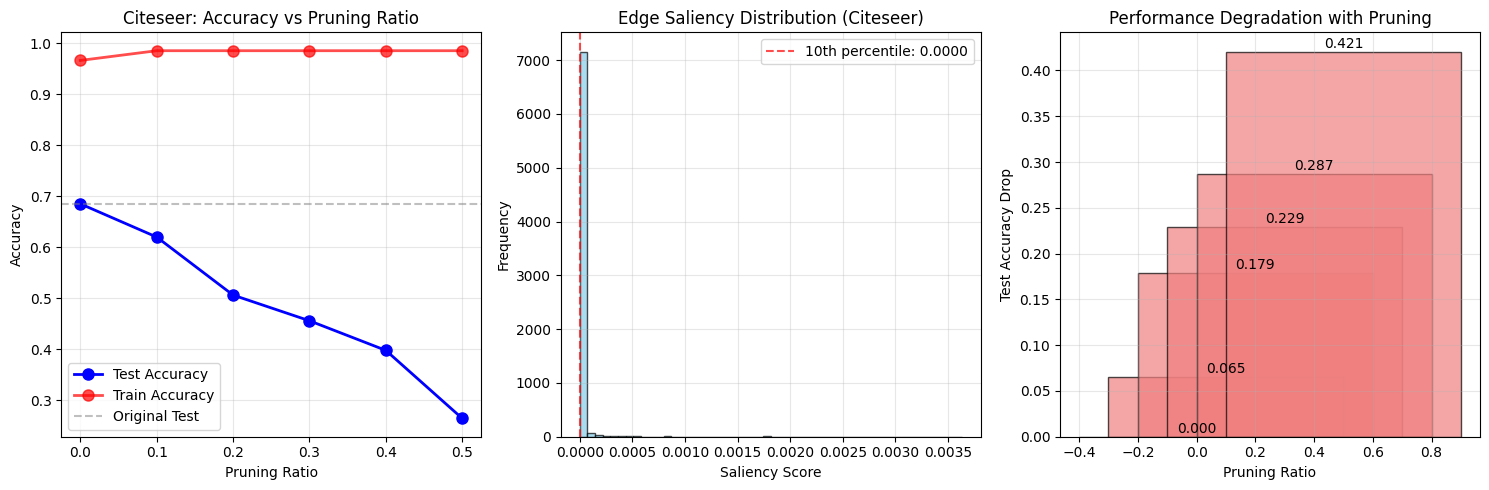

In [25]:
# 4. Visualize results
print("\n" + "="*60)
print("VISUALIZING RESULTS")
print("="*60)

plt.figure(figsize=(15, 5))

# Plot 1: Accuracy vs Pruning Ratio
plt.subplot(1, 3, 1)
target_ratios = [0.0] + [r['target_ratio'] for r in results]
test_accs = [original_acc['test']] + [r['accuracies']['test'] for r in results]
train_accs = [original_acc['train']] + [r['accuracies']['train'] for r in results]

plt.plot(target_ratios, test_accs, 'bo-', linewidth=2, markersize=8, label='Test Accuracy')
plt.plot(target_ratios, train_accs, 'ro-', linewidth=2, markersize=8, label='Train Accuracy', alpha=0.7)
plt.axhline(y=original_acc['test'], color='gray', linestyle='--', alpha=0.5, label='Original Test')

plt.xlabel('Pruning Ratio')
plt.ylabel('Accuracy')
plt.title('Citeseer: Accuracy vs Pruning Ratio')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Saliency distribution
plt.subplot(1, 3, 2)
plt.hist(edge_saliencies, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Saliency Score')
plt.ylabel('Frequency')
plt.title('Edge Saliency Distribution (Citeseer)')
plt.grid(alpha=0.3)

# Add vertical line at 10th percentile
percentile_10 = np.percentile(edge_saliencies, 10)
plt.axvline(x=percentile_10, color='red', linestyle='--', alpha=0.7,
            label=f'10th percentile: {percentile_10:.4f}')
plt.legend()

# Plot 3: Performance drop vs pruning
plt.subplot(1, 3, 3)
performance_drops = [0.0] + [original_acc['test'] - r['accuracies']['test'] for r in results]

bars = plt.bar(target_ratios, performance_drops, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Pruning Ratio')
plt.ylabel('Test Accuracy Drop')
plt.title('Performance Degradation with Pruning')

# Add value labels
for bar, drop in zip(bars, performance_drops):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{drop:.3f}', ha='center', va='bottom')

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


##  **Summary**

In [26]:
# 5. Summary table
print("\n" + "="*60)
print("RESULTS SUMMARY - CITESEER")
print("="*60)

print(f"\n{'Pruning':<12} {'Train':<10} {'Val':<10} {'Test':<10} {'Drop':<10} {'Train-Test Gap':<15}")
print("-" * 77)

print(f"{'0%':<12} {original_acc['train']:<10.4f} {original_acc['val']:<10.4f} "
      f"{original_acc['test']:<10.4f} {'-':<10} "
      f"{original_acc['train'] - original_acc['test']:<15.4f}")

for i, res in enumerate(results):
    test_drop = original_acc['test'] - res['accuracies']['test']
    train_test_gap = res['accuracies']['train'] - res['accuracies']['test']

    print(f"{res['target_ratio']*100:<11.0f}% {res['accuracies']['train']:<10.4f} "
          f"{res['accuracies']['val']:<10.4f} {res['accuracies']['test']:<10.4f} "
          f"{test_drop:<10.4f} {train_test_gap:<15.4f}")


RESULTS SUMMARY - CITESEER

Pruning      Train      Val        Test       Drop       Train-Test Gap 
-----------------------------------------------------------------------------
0%           0.9667     0.7062     0.6854     -          0.2812         
10         % 0.9857     0.5924     0.6203     0.0652     0.3655         
20         % 0.9857     0.5355     0.5065     0.1789     0.4792         
30         % 0.9857     0.4834     0.4562     0.2293     0.5296         
40         % 0.9857     0.4028     0.3981     0.2873     0.5876         
50         % 0.9857     0.2654     0.2648     0.4206     0.7209         


##  **Attention based pruning**

##  **Imports**

In [27]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from deeprobust.graph.defense import GCN
from deeprobust.graph.data import Dataset
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##  **Dataset — Citeseer**

In [28]:
# Load Citeseer dataset
print("=== Loading Citeseer Dataset ===")
data = Dataset(root='/tmp/', name='citeseer', seed=15)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

# Convert to dense tensors
features = torch.FloatTensor(features.todense()).to(device)
labels = torch.LongTensor(labels).to(device)
adj_dense = torch.FloatTensor(adj.todense()).to(device)

# Convert indices to torch tensors
idx_train_torch = torch.LongTensor(idx_train).to(device)
idx_val_torch = torch.LongTensor(idx_val).to(device)
idx_test_torch = torch.LongTensor(idx_test).to(device)

=== Loading Citeseer Dataset ===
Loading citeseer dataset...
Selecting 1 largest connected components


In [29]:
# Convert adjacency to edge_index format
adj_np = adj_dense.cpu().numpy()
edge_indices = np.where(adj_np > 0)
edge_index = torch.tensor([edge_indices[0], edge_indices[1]], dtype=torch.long).to(device)

print(f"Number of nodes: {features.shape[0]}")
print(f"Number of edges: {edge_index.shape[1]}")

Number of nodes: 2110
Number of edges: 7336


##  **Utility Functions**

In [30]:
# ============================================
# GCN MODEL FOR ATTENTION-BASED PRUNING
# ============================================
print("\n=== Setting up Attention-Based Pruning ===")

class AttentionGCN(torch.nn.Module):
    def __init__(self, nfeat, nhid=8, heads=8, dropout=0.6):
        super().__init__()
        self.conv1 = torch.nn.Linear(nfeat, nhid * heads)
        self.attention_weights = torch.nn.Parameter(torch.Tensor(1, 2 * nhid))
        self.heads = heads
        self.nhid = nhid
        self.dropout = dropout
        self.leaky_relu = torch.nn.LeakyReLU(0.2)

        torch.nn.init.xavier_uniform_(self.conv1.weight)
        torch.nn.init.xavier_uniform_(self.attention_weights)

    def compute_attention(self, x, edge_index):
        """Compute attention coefficients for edges"""
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv1(x).view(-1, self.heads, self.nhid)

        src, dst = edge_index
        x_src = x[src]
        x_dst = x[dst]

        x_cat = torch.cat([x_src, x_dst], dim=-1)
        attention_scores = torch.einsum('ehd,df->eh', x_cat, self.attention_weights.T)
        attention_scores = self.leaky_relu(attention_scores)

        max_score = torch.max(attention_scores, dim=0, keepdim=True)[0]
        exp_scores = torch.exp(attention_scores - max_score)

        degree = torch.zeros(features.shape[0], self.heads, device=device)
        degree.index_add_(0, dst, exp_scores)

        attention = exp_scores / (degree[dst] + 1e-8)
        attention_mean = attention.mean(dim=1)

        return attention_mean

    def forward(self, x, edge_index):
        attention = self.compute_attention(x, edge_index)
        return attention


=== Setting up Attention-Based Pruning ===


In [31]:
def compute_accuracy(output, labels, indices=None):
    """Compute accuracy properly"""
    if indices is not None:
        if isinstance(indices, np.ndarray):
            indices = torch.LongTensor(indices).to(output.device)
        output = output[indices]
        labels = labels[indices]

    preds = output.max(1)[1]
    correct = preds.eq(labels).float().sum()
    return (correct / len(labels)).item()

def create_and_train_gcn_proper(adj_matrix, features, labels, idx_train, idx_val, idx_test,
                                model_name="GCN", epochs=200, lr=0.01, weight_decay=5e-4):
    """Train GCN model with early stopping"""
    print(f"\n=== Training {model_name} ===")

    model = GCN(nfeat=features.shape[1],
                nhid=16,
                nclass=labels.max().item() + 1,
                dropout=0.5,
                lr=lr,
                weight_decay=weight_decay,
                device=device)
    model = model.to(device)
    pytorch_model = model

    optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=lr, weight_decay=weight_decay)

    best_val_acc = 0
    best_model_state = None
    patience = 50
    patience_counter = 0

    for epoch in range(epochs):
        pytorch_model.train()
        optimizer.zero_grad()

        output = pytorch_model(features, adj_matrix)
        loss = F.cross_entropy(output[idx_train_torch], labels[idx_train_torch])
        loss.backward()
        optimizer.step()

        pytorch_model.eval()
        with torch.no_grad():
            val_output = pytorch_model(features, adj_matrix)
            val_acc = compute_accuracy(val_output, labels, idx_val)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = pytorch_model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        if epoch % 50 == 0:
            train_acc = compute_accuracy(output, labels, idx_train)
            print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f} | "
                  f"Train: {train_acc:.4f} | Val: {val_acc:.4f}")

    if best_model_state:
        pytorch_model.load_state_dict(best_model_state)

    pytorch_model.eval()
    with torch.no_grad():
        final_output = pytorch_model(features, adj_matrix)
        acc_train = compute_accuracy(final_output, labels, idx_train)
        acc_val = compute_accuracy(final_output, labels, idx_val)
        acc_test = compute_accuracy(final_output, labels, idx_test)

    print(f"Final - Train: {acc_train:.4f}, Val: {acc_val:.4f}, Test: {acc_test:.4f}")

    return pytorch_model, final_output, {'train': acc_train, 'val': acc_val, 'test': acc_test}


In [32]:
def compute_edge_attention(gcn_model, features, edge_index):
    """Compute attention scores for edges using GCN"""
    gcn_model.eval()
    with torch.no_grad():
        attention_scores = gcn_model(features, edge_index)
    return attention_scores.cpu().numpy()

def convert_attention_to_matrix(attention_scores, edge_index, n_nodes):
    """Convert edge attention scores to adjacency matrix format"""
    attention_matrix = np.zeros((n_nodes, n_nodes))

    src_nodes = edge_index[0].cpu().numpy()
    dst_nodes = edge_index[1].cpu().numpy()

    for i, (src, dst) in enumerate(zip(src_nodes, dst_nodes)):
        attention_matrix[src, dst] = attention_scores[i]
        attention_matrix[dst, src] = attention_scores[i]

    return attention_matrix

def prune_edges_by_attention(adj_matrix, attention_matrix, prune_ratio=0.3):
    """Prune edges based on attention scores (LOW attention = prune)"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    edge_indices = np.where(adj_np > 0)
    edge_attentions = attention_matrix[edge_indices]

    sorted_indices = np.argsort(edge_attentions)
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)
    prune_indices = sorted_indices[:n_prune]

    rows_to_prune = edge_indices[0][prune_indices]
    cols_to_prune = edge_indices[1][prune_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0

    print(f"Original edges: {n_edges}")
    print(f"Pruned edges: {n_prune} ({prune_ratio*100:.1f}%)")
    print(f"Remaining edges: {n_edges - n_prune}")

    node_degrees = adj_pruned.sum(axis=1)
    isolated_nodes = np.where(node_degrees == 0)[0]
    if len(isolated_nodes) > 0:
        print(f"Warning: {len(isolated_nodes)} isolated nodes created")

    return torch.FloatTensor(adj_pruned).to(device), prune_ratio

In [33]:
def train_gcn_for_attention(features, edge_index, labels, idx_train, epochs=100):
    """Train GCN model to get meaningful attention scores"""
    print("\nTraining GCN for attention computation...")

    model = AttentionGCN(
        nfeat=features.shape[1],
        nhid=8,
        heads=8,
        dropout=0.6
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        attention = model(features, edge_index)
        src, dst = edge_index
        feature_similarity = F.cosine_similarity(features[src], features[dst])
        loss = F.mse_loss(attention, feature_similarity)

        loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f"GCN Training Epoch {epoch:3d} | Loss: {loss.item():.6f}")

    print("GCN training completed!")
    return model


In [34]:
def random_prune(adj_matrix, prune_ratio=0.3):
    """Randomly prune edges for comparison"""
    adj_np = adj_matrix.cpu().numpy().copy()
    adj_pruned = adj_np.copy()

    edge_indices = np.where(adj_np > 0)
    n_edges = len(edge_indices[0])
    n_prune = int(n_edges * prune_ratio)

    random_indices = np.random.choice(len(edge_indices[0]), n_prune, replace=False)
    rows_to_prune = edge_indices[0][random_indices]
    cols_to_prune = edge_indices[1][random_indices]

    for i, j in zip(rows_to_prune, cols_to_prune):
        adj_pruned[i, j] = 0
        adj_pruned[j, i] = 0

    return torch.FloatTensor(adj_pruned).to(device)

##  **Main Experiment**

In [35]:
# MAIN EXPERIMENT: ATTENTION-BASED PRUNING
print("\n" + "="*60)
print("ATTENTION-BASED PRUNING EXPERIMENT - CITESEER")
print("="*60)

# 1. Train original GCN model
print("\n1. Training Original GCN Model...")
original_model, original_output, original_acc = create_and_train_gcn_proper(
    adj_dense, features, labels, idx_train, idx_val, idx_test,
    "Original GCN", epochs=200, lr=0.01, weight_decay=5e-4
)

print(f"\nOriginal Model Results:")
print(f"  Train Accuracy: {original_acc['train']:.4f}")
print(f"  Validation Accuracy: {original_acc['val']:.4f}")
print(f"  Test Accuracy: {original_acc['test']:.4f}")



ATTENTION-BASED PRUNING EXPERIMENT - CITESEER

1. Training Original GCN Model...

=== Training Original GCN ===
Epoch   0 | Loss: 11.6369 | Train: 0.1381 | Val: 0.3270
Epoch  50 | Loss: 0.4456 | Train: 0.8238 | Val: 0.6777
Epoch 100 | Loss: 0.2802 | Train: 0.8905 | Val: 0.7014
Early stopping at epoch 107
Final - Train: 0.9571, Val: 0.7014, Test: 0.6582

Original Model Results:
  Train Accuracy: 0.9571
  Validation Accuracy: 0.7014
  Test Accuracy: 0.6582


##  **Model Training:**

In [36]:
# 2. Train GCN for attention computation
print("\n2. Training GCN for Attention Scores...")
trained_gcn = train_gcn_for_attention(features, edge_index, labels, idx_train, epochs=100)



2. Training GCN for Attention Scores...

Training GCN for attention computation...
GCN Training Epoch   0 | Loss: 0.086243
GCN Training Epoch  20 | Loss: 0.085238
GCN Training Epoch  40 | Loss: 0.085253
GCN Training Epoch  60 | Loss: 0.085183
GCN Training Epoch  80 | Loss: 0.085171
GCN training completed!


In [37]:
# 3. Compute attention scores
print("\n3. Computing Edge Attention Scores...")
edge_attention_scores = compute_edge_attention(trained_gcn, features, edge_index)
attention_matrix = convert_attention_to_matrix(
    edge_attention_scores, edge_index, features.shape[0]
)

edge_attentions = attention_matrix[adj_dense.cpu().numpy() > 0]
print(f"\nAttention Statistics:")
print(f"  Min: {edge_attentions.min():.6f}")
print(f"  Max: {edge_attentions.max():.6f}")
print(f"  Mean: {edge_attentions.mean():.6f}")
print(f"  Median: {np.median(edge_attentions):.6f}")



3. Computing Edge Attention Scores...

Attention Statistics:
  Min: 0.008790
  Max: 1.000000
  Mean: 0.298982
  Median: 0.213500


In [38]:
# 4. Test different pruning ratios based on attention
print("\n4. Testing Different Attention-Based Pruning Ratios...")
prune_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
attention_results = []

for ratio in prune_ratios:
    print(f"\n{'='*50}")
    print(f"Testing {ratio*100:.0f}% Attention-Based Pruning")
    print('='*50)

    adj_pruned, actual_ratio = prune_edges_by_attention(
        adj_dense, attention_matrix, prune_ratio=ratio
    )

    model_name = f"Attention-Pruned ({ratio*100:.0f}%)"
    pruned_model, pruned_output, pruned_acc = create_and_train_gcn_proper(
        adj_pruned, features, labels, idx_train, idx_val, idx_test,
        model_name, epochs=200, lr=0.01, weight_decay=5e-4
    )

    attention_results.append({
        'target_ratio': ratio,
        'actual_ratio': actual_ratio,
        'accuracies': pruned_acc,
        'adj_pruned': adj_pruned
    })



4. Testing Different Attention-Based Pruning Ratios...

Testing 10% Attention-Based Pruning
Original edges: 7336
Pruned edges: 733 (10.0%)
Remaining edges: 6603

=== Training Attention-Pruned (10%) ===
Epoch   0 | Loss: 5.9097 | Train: 0.1667 | Val: 0.3081
Epoch  50 | Loss: 0.2749 | Train: 0.9048 | Val: 0.6730
Early stopping at epoch 59
Final - Train: 0.9714, Val: 0.6777, Test: 0.6748

Testing 20% Attention-Based Pruning
Original edges: 7336
Pruned edges: 1467 (20.0%)
Remaining edges: 5869

=== Training Attention-Pruned (20%) ===
Epoch   0 | Loss: 4.9274 | Train: 0.2095 | Val: 0.3697
Epoch  50 | Loss: 0.2267 | Train: 0.8905 | Val: 0.7062
Epoch 100 | Loss: 0.1489 | Train: 0.9476 | Val: 0.7014
Early stopping at epoch 135
Final - Train: 0.9714, Val: 0.6967, Test: 0.6777

Testing 30% Attention-Based Pruning
Original edges: 7336
Pruned edges: 2200 (30.0%)
Remaining edges: 5136

=== Training Attention-Pruned (30%) ===
Epoch   0 | Loss: 4.0606 | Train: 0.1381 | Val: 0.3602
Epoch  50 | Loss: 

##  **Comparison**

In [39]:
# 5. Compare with random pruning
print("\n5. Comparing with Random Pruning...")
print("\nTesting Random Pruning at 20% for comparison...")
adj_random_pruned = random_prune(adj_dense, prune_ratio=0.2)
random_model, random_output, random_acc = create_and_train_gcn_proper(
    adj_random_pruned, features, labels, idx_train, idx_val, idx_test,
    "Random Pruned (20%)", epochs=200
)



5. Comparing with Random Pruning...

Testing Random Pruning at 20% for comparison...

=== Training Random Pruned (20%) ===
Epoch   0 | Loss: 5.3625 | Train: 0.1381 | Val: 0.2607
Epoch  50 | Loss: 0.4208 | Train: 0.8238 | Val: 0.6209
Epoch 100 | Loss: 0.3870 | Train: 0.8333 | Val: 0.6351
Early stopping at epoch 112
Final - Train: 0.9000, Val: 0.6351, Test: 0.6001


##  **Visualization**


VISUALIZING ATTENTION-BASED PRUNING RESULTS - CITESEER


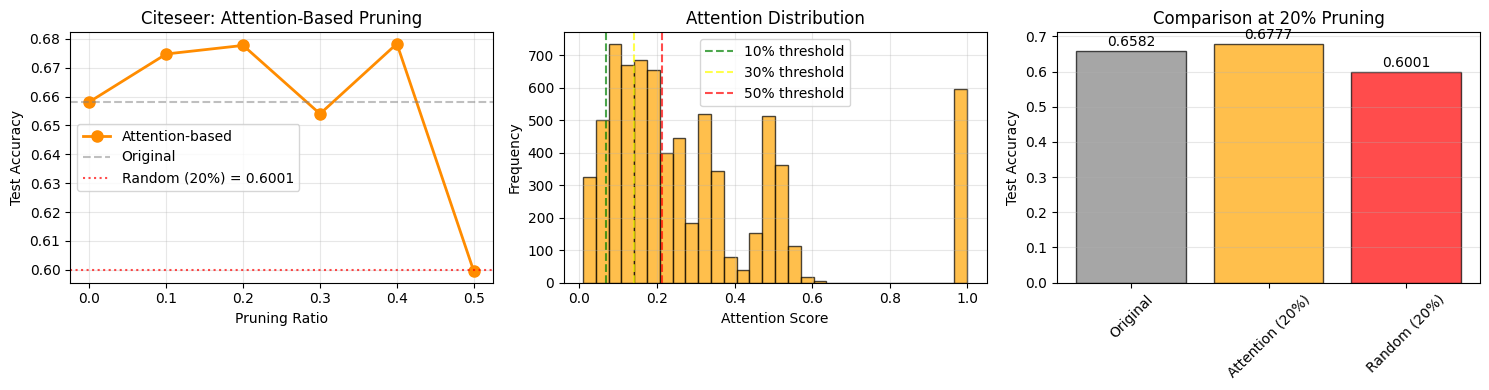

In [40]:
# 6. Visualize comparison
print("\n" + "="*60)
print("VISUALIZING ATTENTION-BASED PRUNING RESULTS - CITESEER")
print("="*60)

plt.figure(figsize=(15, 4))

# Plot 1: Accuracy vs Pruning Ratio
plt.subplot(1, 3, 1)
target_ratios = [0.0] + [r['target_ratio'] for r in attention_results]
test_accs = [original_acc['test']] + [r['accuracies']['test'] for r in attention_results]

plt.plot(target_ratios, test_accs, 'o-', linewidth=2, markersize=8,
         color='darkorange', label='Attention-based')
plt.axhline(y=original_acc['test'], color='gray', linestyle='--', alpha=0.5, label='Original')
plt.axhline(y=random_acc['test'], color='red', linestyle=':', alpha=0.7,
            label=f'Random (20%) = {random_acc["test"]:.4f}')

plt.xlabel('Pruning Ratio')
plt.ylabel('Test Accuracy')
plt.title('Citeseer: Attention-Based Pruning')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Attention distribution
plt.subplot(1, 3, 2)
n_bins = 30
counts, bins, patches = plt.hist(edge_attentions, bins=n_bins, alpha=0.7,
                                 color='orange', edgecolor='black')

for i, ratio in enumerate([0.1, 0.3, 0.5]):
    threshold = np.percentile(edge_attentions, ratio * 100)
    plt.axvline(x=threshold, color=['green', 'yellow', 'red'][i],
                linestyle='--', alpha=0.7, label=f'{ratio*100:.0f}% threshold')

plt.xlabel('Attention Score')
plt.ylabel('Frequency')
plt.title('Attention Distribution')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Performance comparison at 20% pruning
plt.subplot(1, 3, 3)
comparison_data = {
    'Original': original_acc['test'],
    'Attention (20%)': attention_results[1]['accuracies']['test'],
    'Random (20%)': random_acc['test']
}

colors = ['gray', 'orange', 'red']
bars = plt.bar(range(len(comparison_data)), list(comparison_data.values()),
               color=colors, alpha=0.7, edgecolor='black')

plt.xticks(range(len(comparison_data)), list(comparison_data.keys()), rotation=45)
plt.ylabel('Test Accuracy')
plt.title('Comparison at 20% Pruning')
plt.grid(alpha=0.3, axis='y')

for bar, val in zip(bars, comparison_data.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


##  **Summary**

In [41]:
# 7. Results summary
print("\n" + "="*60)
print("ATTENTION-BASED PRUNING SUMMARY - CITESEER")
print("="*60)

print(f"\n{'Pruning':<15} {'Train':<10} {'Val':<10} {'Test':<10} {'Drop':<10}")
print("-" * 55)

print(f"{'Original':<15} {original_acc['train']:<10.4f} {original_acc['val']:<10.4f} "
      f"{original_acc['test']:<10.4f} {'-':<10}")

for i, res in enumerate(attention_results):
    test_drop = original_acc['test'] - res['accuracies']['test']

    print(f"{res['target_ratio']*100:<14.0f}% {res['accuracies']['train']:<10.4f} "
          f"{res['accuracies']['val']:<10.4f} {res['accuracies']['test']:<10.4f} "
          f"{test_drop:<10.4f}")

print(f"\n{'Random 20%':<15} {random_acc['train']:<10.4f} {random_acc['val']:<10.4f} "
      f"{random_acc['test']:<10.4f} "
      f"{original_acc['test'] - random_acc['test']:<10.4f}")

print("\n=== Experiment Complete ===")


ATTENTION-BASED PRUNING SUMMARY - CITESEER

Pruning         Train      Val        Test       Drop      
-------------------------------------------------------
Original        0.9571     0.7014     0.6582     -         
10            % 0.9714     0.6777     0.6748     -0.0166   
20            % 0.9714     0.6967     0.6777     -0.0195   
30            % 0.9619     0.6209     0.6540     0.0041    
40            % 0.9476     0.6682     0.6783     -0.0201   
50            % 0.8857     0.5829     0.5995     0.0586    

Random 20%      0.9000     0.6351     0.6001     0.0581    

=== Experiment Complete ===
